# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Loading the dataset

In [2]:
df = pd.read_csv('../ratings_Beauty.csv')


In [3]:
df

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


As you can see the "ratings_Beauty.csv" dataframe has 4 columns.

UserId - Every user is represented by an unique Id.

ProductId - Every product is represented by an unique Id.

Rating - Represents the rating given by the user to the corresponding product.

Timestamp - The time at which the rating was recorded.

In [4]:
df.shape

(2023070, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [6]:
df.describe()

,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


Some insights that can be drawn are:
1. The maximum rating given to a product is 5 and the minimum rating given to a product is 1
2. The total number of ratings given to all products is 2.23070
3. The average rating that is the mean ratings given by the users to all the products is 4.1

The column timestamp given no useful information to build the recommendation system. Hence removing it.

In [7]:
df.drop(['Timestamp'], axis=1, inplace=True)

In the dataset the only feature variable is Rating. We can use box plot and voilen plot to find more insights about it.

<AxesSubplot:ylabel='Rating'>

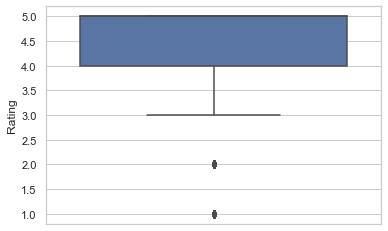

In [8]:
sns.set(style="whitegrid")
sns.boxplot(y = df['Rating'])

The above box plot shows all the statistical information of the Ratings data. To understand more about the distribution, we can use voilen plot.

<AxesSubplot:ylabel='Rating'>

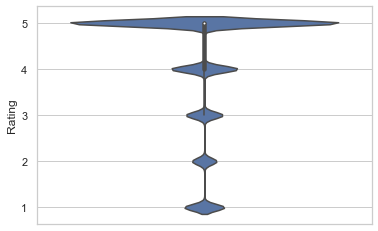

In [9]:
sns.violinplot(y = df.Rating)

In [10]:
df_n_ratings = pd.DataFrame(df.groupby('ProductId')['Rating'].mean())
df_n_ratings['total ratings'] = pd.DataFrame(df.groupby('ProductId')['Rating'].count())
df_n_ratings.rename(columns = {'Rating': 'mean ratings'}, inplace=True)

df_n_ratings.sort_values('total ratings', ascending=False).head(10)

,mean ratings,total ratings
ProductId,,
B001MA0QY2,4.321386,7533
B0009V1YR8,3.568839,2869
B0043OYFKU,4.310456,2477
B0000YUXI0,4.405040,2143
B003V265QW,4.365421,2088
B000ZMBSPE,4.422342,2041
B003BQ6QXK,4.625652,1918
B004OHQR1Q,4.465782,1885
B00121UVU0,4.538085,1838


Most of these products stand among the Top 50 products which are rated all time high.

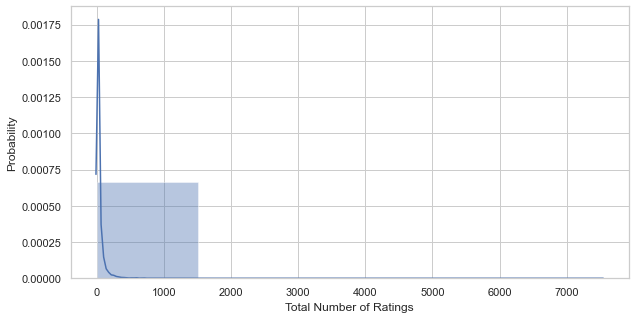

In [11]:
plt.figure(figsize=(10,5))
sns.distplot(df_n_ratings['total ratings'], bins=5)
plt.xlabel('Total Number of Ratings')
plt.ylabel('Probability')
plt.show()

We can see that -
1. Majority of the products have less than 100 ratings.
2. The number of products having more than 100 ratings is very low.

In [12]:
df_n_ratings.sort_values('mean ratings', ascending=False).head(10)

,mean ratings,total ratings
ProductId,,
0205616461,5.0,1
B00551HYQC,5.0,1
B0054ZSIXC,5.0,2
B00550UX52,5.0,2
B00550YQP0,5.0,3
B0055189P2,5.0,2
B00551BAAI,5.0,2
B00551EJWE,5.0,1
B00551I2ZY,5.0,1


In [13]:
print('Total no of users that gave rating of 5.0 : ', len(df_n_ratings.loc[df_n_ratings['mean ratings'] == 5]), '\n')
print('Total no of Individual users that gave rating of 5.0 : ', len(df_n_ratings.loc[(df_n_ratings['mean ratings'] == 5) 
                                                                           & (df_n_ratings['total ratings'] == 1)]))

Total no of users that gave rating of 5.0 :  95848 

Total no of Individual users that gave rating of 5.0 :  64685


1. As you can see there are over 95848 users that have rated 5 stars, among which there are 64685 individual raters ( only user to rate the product 5 star ).

2. So, this cannot be the lone factor that should be considered while recommending products. As this factor only shows the preferences of a particular user.

3. It would make a good recommendation system if we can use both the factors ( -> Highly Rated Products and Heavily Rated Products <- ) together.

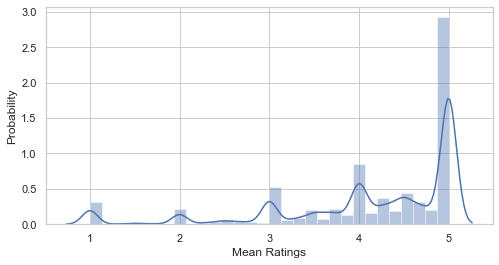

In [14]:
plt.figure(figsize=(8,4))
sns.distplot(df_n_ratings['mean ratings'], bins=30)
plt.xlabel('Mean Ratings')
plt.ylabel('Probability')
plt.show()

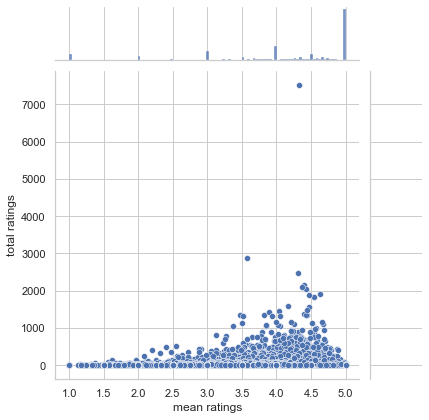

In [15]:
sns.jointplot(x = 'mean ratings', y = 'total ratings', data = df_n_ratings )

1. Here, as you can see every Data Point represents a distinct product, with y-coordinate representing the total no of users which has rated that product and x-coordinate representing the mean of all the ratings of the corresponding users.
2. Also you can see that there is a huge Density in the region corresponding to 0-1000 no of users and between mean rating 3.5-5